In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Take off display limitations on Pandas dataframe presentation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#create the dataframes
client_df = pd.read_csv('C:/Users/Sinamandla Mabaso/Desktop/BCG work simulation/Task 2/client_data.csv')
price_df = pd.read_csv('C:/Users/Sinamandla Mabaso/Desktop/BCG work simulation/Task 2/price_data.csv')

In [2]:
#Coleague feature engineering sample#
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               16096 non-null  object 
 1   offpeak_diff_dec_january_energy  16096 non-null  float64
 2   offpeak_diff_dec_january_power   16096 non-null  float64
dtypes: float64(2), object(1)
memory usage: 377.4+ KB


In [5]:
#merge the data sets and make sure the id columns match
combined_df = pd.merge(diff, client_df, on='id', how='right')

In [6]:
combined_df.head(40)

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.020057,3.700961,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,-0.003767,0.177779,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,-0.004670,0.177779,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,-0.004547,0.177779,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,-0.006192,0.162916,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
5,1aa498825382410b098937d65c4ec26d,-0.008087,-0.000001,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,1998,0.0,30.12,0.164775,0.086131,45.308378,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,-0.004628,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,0,0.0,0.00,0.166178,0.087538,44.311378,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1
7,01495c955be7ec5e7f3203406785aae0,-0.007801,0.162916,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,751,0.0,144.49,0.115174,0.098837,40.606701,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
8,f53a254b1115634330c12c7fdbf7958a,-0.003767,0.177779,usilxuppasemubllopkaafesmlibmsdf,2962,0,0,2011-09-23,2016-09-23,2011-09-23,2015-09-25,444.38,0,0.0,15.85,0.145711,0.000000,44.311378,f,0.00,12.82,12.82,1,42.59,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
9,10c1b2f97a2d2a6f10299dc213d1a370,-0.007137,0.000000,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,2010-05-04,2016-05-04,2015-04-29,2015-05-05,2738.10,2188,0.0,130.43,0.115761,0.099419,40.606701,f,219.59,33.42,33.42,1,329.60,6,lxidpiddsbxsbosboudacockeimpuepw,31.500,0


In [7]:
#Clean the data
#check if the merge process is complete, considering info() does not give
#a perfect picture, we must do it a different way by using isnull() and sum()
combined_df_missing_values = combined_df.isnull().sum()

print("Missing Values in combined DataFrame:")
print(combined_df_missing_values)

Missing Values in combined DataFrame:
id                                 0
offpeak_diff_dec_january_energy    0
offpeak_diff_dec_january_power     0
channel_sales                      0
cons_12m                           0
cons_gas_12m                       0
cons_last_month                    0
date_activ                         0
date_end                           0
date_modif_prod                    0
date_renewal                       0
forecast_cons_12m                  0
forecast_cons_year                 0
forecast_discount_energy           0
forecast_meter_rent_12m            0
forecast_price_energy_off_peak     0
forecast_price_energy_peak         0
forecast_price_pow_off_peak        0
has_gas                            0
imp_cons                           0
margin_gross_pow_ele               0
margin_net_pow_ele                 0
nb_prod_act                        0
net_margin                         0
num_years_antig                    0
origin_up                          0


In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               14606 non-null  object 
 1   offpeak_diff_dec_january_energy  14606 non-null  float64
 2   offpeak_diff_dec_january_power   14606 non-null  float64
 3   channel_sales                    14606 non-null  object 
 4   cons_12m                         14606 non-null  int64  
 5   cons_gas_12m                     14606 non-null  int64  
 6   cons_last_month                  14606 non-null  int64  
 7   date_activ                       14606 non-null  object 
 8   date_end                         14606 non-null  object 
 9   date_modif_prod                  14606 non-null  object 
 10  date_renewal                     14606 non-null  object 
 11  forecast_cons_12m                14606 non-null  float64
 12  forecast_cons_year

In [9]:
#clean the columns "channel_sales" and "origin_up" and replace the "MISSING" with the mode of the column
most_frequent_value = combined_df['channel_sales'].mode()[0]
most_frequent_value = combined_df['origin_up'].mode()[0]

#replace the value
client_df['channel_sales'].replace('MISSING', most_frequent_value, inplace=True)
client_df['origin_up'].replace('MISSING', most_frequent_value, inplace=True)

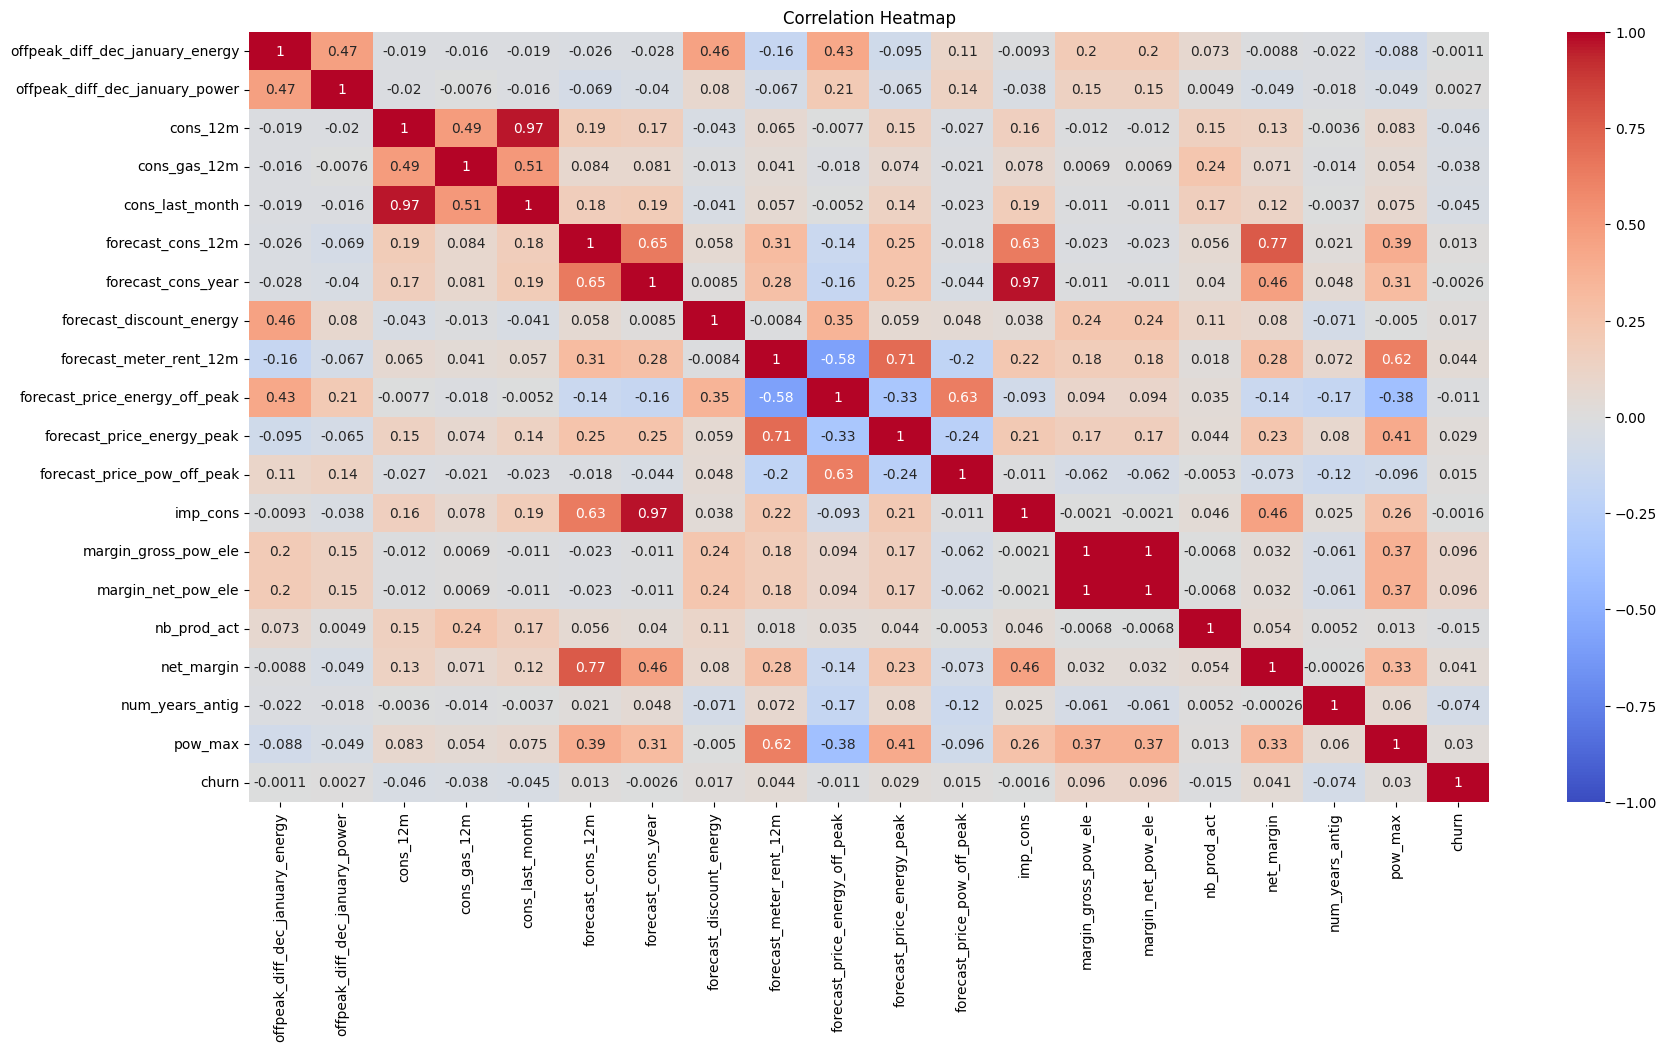

In [10]:
#look at all numeric features and see the correlation to "churn"
combined_corr = combined_df.select_dtypes(exclude=['object'])
correlation_matrix = combined_corr.corr()
correlation_with_churn = correlation_matrix['churn'].sort_values(ascending=False)

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
#Select the 'Object' features and then do feature encoding
non_numeric_columns = combined_df.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_columns=non_numeric_columns[1:]

label_encoder = LabelEncoder()
# Convert non-numeric columns to numeric labels
for col in non_numeric_columns:
    combined_df[col] = label_encoder.fit_transform(combined_df[col])

In [13]:
combined_df.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.020057,3.700961,4,0,54946,0,1764,138,2067,215,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,4,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,-0.003767,0.177779,0,4660,0,0,589,214,416,266,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,2,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,-0.004670,0.177779,4,544,0,0,786,78,599,173,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,2,13.856,0
3,bba03439a292a1e166f80264c16191cb,-0.004547,0.177779,5,1584,0,0,773,61,586,161,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,2,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,-0.006192,0.162916,0,4425,0,526,711,38,528,147,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,2,19.800,0


In [14]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# Split your data into features (X) and the target variable (y)
X = combined_df.drop(['id', 'churn'], axis=1, errors="ignore")
y = combined_df['churn']

# Split the data into training and testing sets for both classification and regression
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification using RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_class, y_train_class)
y_pred_class = clf.predict(X_test_class)

# Regression using RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)

# Calculate classification accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Classification Accuracy:", accuracy)

# Calculate regression Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Regression Mean Squared Error:", mse)

Classification Accuracy: 0.9007529089664613
Regression Mean Squared Error: 0.0852482546201232


Classification Accuracy: 0.9007529089664613
Regression Mean Squared Error: 0.0852482546201232


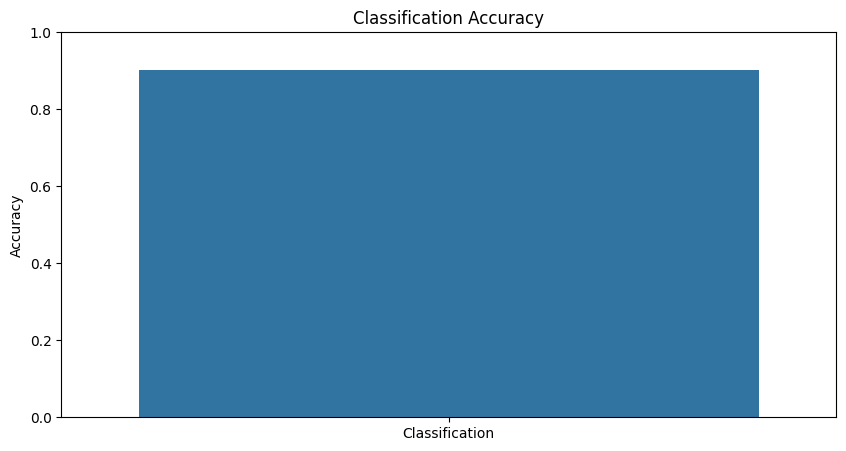

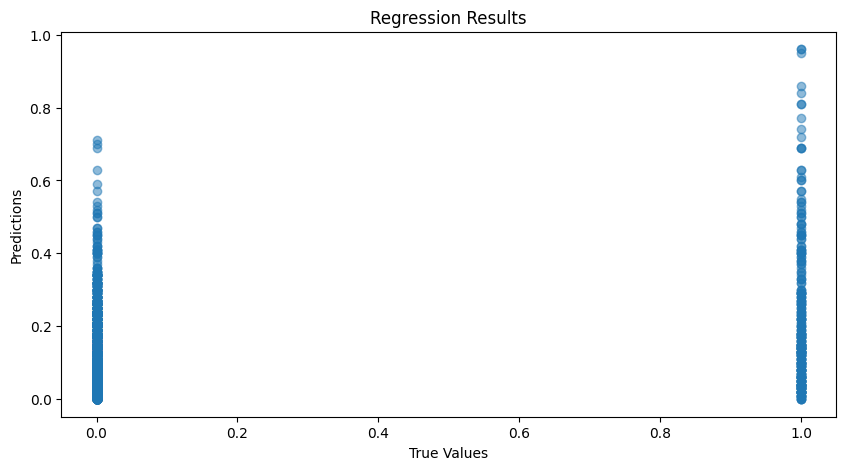

In [15]:
#PLot the results visually
# Calculate classification accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Classification Accuracy:", accuracy)

# Calculate regression Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Regression Mean Squared Error:", mse)

# Create a bar plot for classification accuracy
plt.figure(figsize=(10, 5))
sns.barplot(x=["Classification"], y=[accuracy])
plt.title("Classification Accuracy")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.show()

# Create a scatter plot for regression results
plt.figure(figsize=(10, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.title("Regression Results")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [ ]:
"""Conclusion, the classification is a better option for predicting customer churn"""